In [531]:
from sklearn import cross_validation
from sklearn.datasets import load_boston

import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train = pd.read_csv('/Users/suzukishinji/Downloads/train.csv')

【データ読み込み】
データを読みこむことができたら、前処理や可視化を行っていくため、データの現状を確認しましょう。

In [532]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


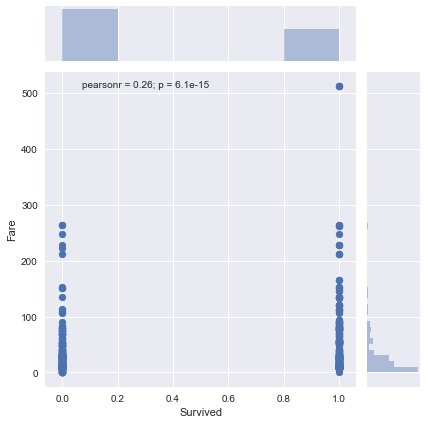

In [533]:
sns.jointplot(x = "Survived", y = "Fare", data = train);

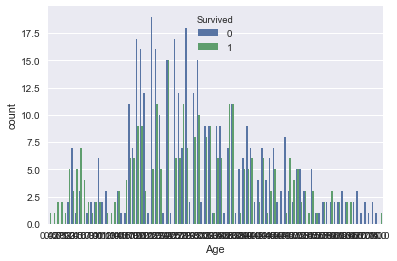

In [534]:
sns.countplot("Age", data=train, hue = "Survived")

【前処理について記述せよ】

前処理とは機械学習が行えるように（行いやすいように）データを処理すること。

例えば欠損値があると、それだけ結果がブレてしまうため、事前に取り除くなどの処理を行う必要がある。

具体的には前処理はそれぞれ下記のような目的のもと作業を行う。

データのクリーニング: 欠落値を入力し、ノイズ データや外れ値を検出して削除することで精度を上げる。

データの変換: データを正規化して、次元やノイズを少なくし精度を上げる。

データの削減: データのレコードまたは属性をサンプリングして、データを処理しやすくする。

データの離散化: 連続値の属性をカテゴリ別の属性に変換して、機械学習の特定の方式で使いやすくする。

【2/前処理について記述せよ】
データを確認する際には下記のような点を見るとよい

・レコードの数

・属性 (または特徴) の数

・属性の データ型 (ノミナル、順序、連続)

・欠落値の数

・形式の一貫性 

・一貫性のないデータ レコード

In [535]:
X=pd.DataFrame(train)
yy=X['Survived']
xx = X.drop(['PassengerId'], axis=1)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xx,yy,test_size=0.2,random_state=0)

In [536]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    

def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

data_train = transform_features(x_train)
data_test = transform_features(x_test)
data_train

/Users/suzukishinji/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/suzukishinji/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/suzukishinji/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
140,0,3,female,Unknown,0,2,3_quartile,N,"Boulos,",Mrs.
439,0,2,male,Young Adult,0,0,2_quartile,N,"Kvillner,",Mr.
817,0,2,male,Young Adult,1,1,4_quartile,N,"Mallet,",Mr.
378,0,3,male,Student,0,0,1_quartile,N,"Betros,",Mr.
491,0,3,male,Student,0,0,1_quartile,N,"Windelov,",Mr.
331,0,1,male,Adult,0,0,3_quartile,C,"Partner,",Mr.
588,0,3,male,Student,0,0,2_quartile,N,"Gilinski,",Mr.
358,1,3,female,Unknown,0,0,1_quartile,N,"McGovern,",Miss.
674,0,2,male,Unknown,0,0,Unknown,N,"Watson,",Mr.
162,0,3,male,Young Adult,0,0,1_quartile,N,"Bengtsson,",Mr.


In [539]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])

    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test

data_train, data_test = encode_features(data_train, data_test)
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
140,0,3,0,6,0,2,2,7,67,18
439,0,2,1,7,0,0,1,7,319,17
817,0,2,1,7,1,1,3,7,367,17
378,0,3,1,4,0,0,0,7,56,17
491,0,3,1,4,0,0,0,7,646,17


【前処理の内容について記述せよ】

simplify_ages

simplify_cabins

simplify_fares

format_name

drop_features

encode_features

以上のメソッドがそれぞれ何を行っているか記述せよ
それぞれなぜそのようなことを行っているか記述せよ(それによって得られるメリットまで考察すること)

・simplify_ages
乗客の年齢を不明、赤ん坊からシニアと８つのカテゴリに分ける。
年齢のカテゴリ毎の特徴を見ることができる。

・simplify_cabins
客室番号の頭文字（N、C等）を取り出している。
詳細な部屋番号ではなく、エリア単位での分析を行うことができる。

・simplify_fares
運賃の高さを４分割に分けている。
運賃の高低差による影響の有無を分析することができる。

・format_name
名前部分を「名前」と「敬称」に分けている。
ファミリーの抽出などに使うことができる。

・drop_features
'Ticket', 'Name', 'Embarked'のデータを外している。
不要なデータを削除することで分析対象を絞ることができる。

・encode_features
情報を数値化している。
数値化することで数式等のモデルで使用することができる。

【モデル選択について記述せよ】

今回使用するモデルは決定していますが、モデル選択をする際の演習を行いましょう。

今回は、生存予測（分類）を行いますが、この分類について使用できそうな手法を4つ以上しらべて記述せよ。
その手法の概要をそれぞれ記述せよ
その手法の長所/短所をそれぞれ3つずつ、記述したすべての手法において記述せよ


・KNNまたはk-Nearest Neighbors

あるオブジェクトの分類は、その近傍のオブジェクト群の投票によって決定される。k 個の最近傍のオブジェクト群で最も一般的なクラスをそのオブジェクトに割り当てる。

・長所

シンプルである

漸近的な性質が理論的に導出可能

分布に対する仮定が少ない。滑らかさくらい

・短所

推定した密度が積分して１になるとは限らない

推定した密度関数は不連続になりえる

ノイズに弱い

推定された分布は裾が重い



・サポートベクターマシン

２クラス分類識別器の一種。マージン最大化という方針で識別平面を決定するので高い汎化能力が期待できる。

・長所

高い汎化能力

局所最適解の問題が発生しない

最適化すべきパラメータが少ない

・短所

学習データが増えると計算量が膨大になる

基本的に２クラスの分類にしか使えない

多クラスの場合に工夫が必要


・ランダムフォレスト

それぞれの決定木で使う特徴量をあらかじめ決められた数だけランダムに選択する。
複数の決定木を作り多数決で分類を行う手法。

・長所

ノイズに強い

高精度・表現力が高い

データ量が多くても早い

どの特徴量が重要かを知ることができる

・短所

パラメータが多い

過学習になる

データと変数をランダムに抽出するのでデータと変数が少なすぎるとうまく学習できない


・決定木

目的変数と説明変数のデータから木構造の分類きを生成。
トップダウンに再帰的にデータを分割していく。

・長所

データの前処理などがあまり必要ない

超平面では分割が困難であるような判別問題に対しても適用が可能

アウトプットの解釈が容易

・短所

分類性能が高い手法ではない

線型性のあるデータには適していない

データが少し変わるだけで違う木が生成されることがある（不安定）



【モデル選択の基準】
下記の参考資料を元に、どのような視点からモデルを選択すれば良いか、最低でも3つ以上の視点を記述すること(他の参考資料でも構わない、その場合参考資料を明記すること)

「予測精度」

「中身のわかりやすさ」

「トレーニングの時間」

【モデル選択におけるデータ可視化】

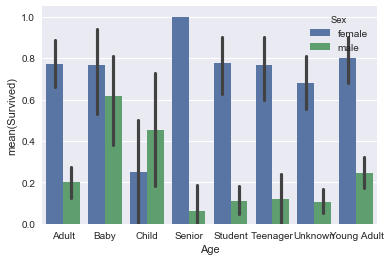

In [541]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x="Age", y="Survived", hue="Sex", data=x_train);

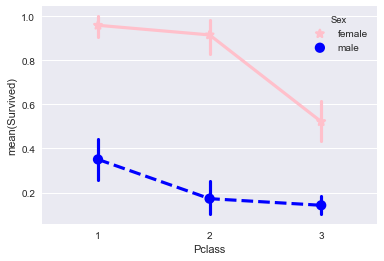

In [542]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=x_train,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

【データ可視化の結果について考察せよ】

上記の２つの可視化から分かったことについて考察せよ。

・ほぼ全ての年齢層で女性の生存率が高い。

・客室等級の高いほうが生存率が高い。

上記の考察結果から、モデル選択を考える場合、どのようなことが考えられるか

・分類問題

・年齢・性別・客室等級で生存分類を枝分かれさせていく

【ランダムフォレストについて記述せよ】

以下の観点をすべて含めて記述しましょう。

・決定木とはどのような手法か

ノード（節点、頂点、属性）とノード間を結ぶエッジ（枝、辺、その値の組）によって分類を行うためのデータ構造

・ランダムフォレストとはどのような手法か

それぞれの決定木で使う特徴量をあらかじめ決められた数だけランダムに選択する。
複数の決定木を作り多数決で分類を行う手法。

・ランダムフォレストの長所と短所をそれぞれ3つ以上挙げてください。

長所：ノイズに強い、高精度・表現力が高い、データ量が多くても早い、どの特徴量が重要かを知ることができる

短所：パラメータが多い、過学習になる、データと変数をランダムに抽出するのでデータと変数が少なすぎるとうまく学習できない

今回の目的からランダムフォレストの手法が適する理由を考察し、記述せよ

モデル信頼スコアはこれまでに評価されたモデルの中でも高い。
要因の可能性のある年齢・性別・客室等級を特徴量として扱い、どれが重要か知ることができる。

※決定木とランダムフォレストについては、前述のモデル選択について記述せよにおいて記述していた場合、同じものを記述しても構いません。

【accuracyを求めよ】

In [543]:
X=pd.DataFrame(train)
yy=X['Survived']
xx = X.drop(['Survived', 'PassengerId'], axis=1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xx,yy,test_size=0.2,random_state=0)

In [544]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    

def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

data_train = transform_features(x_train)
data_test = transform_features(x_test)
data_train

/Users/suzukishinji/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/suzukishinji/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/suzukishinji/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
140,3,female,Unknown,0,2,3_quartile,N,"Boulos,",Mrs.
439,2,male,Young Adult,0,0,2_quartile,N,"Kvillner,",Mr.
817,2,male,Young Adult,1,1,4_quartile,N,"Mallet,",Mr.
378,3,male,Student,0,0,1_quartile,N,"Betros,",Mr.
491,3,male,Student,0,0,1_quartile,N,"Windelov,",Mr.
331,1,male,Adult,0,0,3_quartile,C,"Partner,",Mr.
588,3,male,Student,0,0,2_quartile,N,"Gilinski,",Mr.
358,3,female,Unknown,0,0,1_quartile,N,"McGovern,",Miss.
674,2,male,Unknown,0,0,Unknown,N,"Watson,",Mr.
162,3,male,Young Adult,0,0,1_quartile,N,"Bengtsson,",Mr.


In [545]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])

    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test

data_train, data_test = encode_features(data_train, data_test)
data_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
140,3,0,6,0,2,2,7,67,18
439,2,1,7,0,0,1,7,319,17
817,2,1,7,1,1,3,7,367,17
378,3,1,4,0,0,0,7,56,17
491,3,1,4,0,0,0,7,646,17


In [562]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, max_features=9, max_depth=40,criterion='entropy', random_state=0)
clf.fit(data_train, y_train)

print(clf.score(data_train, y_train))
print(clf.score(data_test, y_test))

0.998595505618
0.815642458101


【精度を高める】
この課題では75%以上の精度が出ていた場合、合格とします。

【ハイパーパラメータについて】

・ハイパーパラメーターとは何か

モデルに事前に手で投入するパラメータ。
機械学習で学習されない、機械学習の上にある（ハイパーな）パラメータ。

ランダムフォレストにおいてどのようなハイパーパラメーターがあるか4つ以上記述せよ。

記述したハイパーパラメーターにおいて、それぞれどのような値が存在するか記述せよ（そのハイパーパラメーターを変化させるとどのようなことが起きるかも記述すること）

n_estimators：決定木の数：整数を指定．デフォルトの値は10：大きい方が良いが、計算に時間がかかる

max_depth：決定木の深さ：整数または None を指定．決定木の深さの最大値を指定：深ければ深いほど複雑な分岐になるが過学習を起こしやすくなる

max_features：決定木の特徴量の数：整数，小数，文字列または None を指定：大きいと似たような決定木が増える、小さいと決定木がばらけるがデータに適合できにくくなる。

random_state：乱数のタネの指定：デフォルト値なし。乱数ジェネレータをどの数値から始めるか。前回と異なるモデルを得たい場合は数値を変更すると良い


【チューニング】


【検証について記述せよ】

・検証は何か

UnderFittingとOverFittingが起こっていることを判明させること。
性能評価用のパラメータ値を得るために学習に使用した訓練データを性能評価に使用すると過適応（Overfitting）、あるいは未適応（Underfitting）の状態を含んだ見積り値になるため、汎化性能を検証できない。

・なぜ検証を行う必要があるのか(Accuracyだけではダメな理由も含めること)

モデルの汎用性を評価する方法もいろいろある。
例えば不均衡データに対する予測精度の評価について，Accuracyを用いて評価を行うと，不当に高い値が得られてしまう。
評価指標はそれぞれ一長一短で特性も異なるので，出来る限り複数種類の評価指標で予測精度を検証した方が良い。
偏りのあるデータでのモデル評価は、適合率と再現率からF値を求める。

・主な検証方法について2つ以上記述せよ

学習曲線

ホールドアウト法

k分割交差検証

【KFoldについて記述せよ】
以下の観点をすべて含めて記述しましょう。

・K-分割交差検証について説明せよ

それ以上データを集めるのが困難の場合に、有用な交差検証方法

・K-分割交差検証はデータセットを何個に分割するか

データをK個に分割

・データセットを分割する際、その個数はどのように考えると良いか

K個のうちの1つをテストとし、残る K−1 個のデータを学習用データとする

・K-分割交差検証は何回の検証を行うか

K回繰り返す

・K-分割交差検証の結果は、最終的にどのように求められるか

K-1のデータセットで学習を行い、1つに分割されたテストデータでテストを行う。分割されたK個のそれぞれのデータの組み合わせに対してK回繰り返す。最後にそれぞれの回で導き出した精度を平均化させて結果を導く。

【Kfoldの結果を確認する】

Kfoldの結果(Mean Accuracy)が75%以上になっていれば成功です。
そうでなければ、再度モデルのチューニングを行いましょう。

In [556]:
data_train_n = np.array(data_train)
data_train_y = np.array(y_train)

scikit-learn は入出力がNumpy。
しかし、前処理をpandasで行うため、（入力することができる場合もあるが）入力時にはpandasからNumpyに変換が必要。
形式の違いからエラーが発生してしまう。

In [549]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)
kf.get_n_splits(data_train_n)

3

In [550]:
print(kf) 

KFold(n_splits=3, random_state=None, shuffle=False)


In [551]:
KFold

sklearn.model_selection._split.KFold

In [558]:
from sklearn import svm
import numpy as np

for train_index, test_index in kf.split(data_train_n):
    X_train, X_test = data_train_n[train_index], data_train_n[test_index]
    Y_train, Y_test = data_train_y[train_index], data_train_y[test_index]
    break

In [559]:
    clf = svm.SVC(kernel='linear', C=1).fit(X_train, Y_train)
    print(clf.score(X_test, Y_test))

0.773109243697


【どの特徴量が重要であったかを調査する】

sklearnでランダムフォレストを実装すると用意にどのどの特徴量が重要であったかを判明させることができます。

feature_importances_メソッドを使用して、判明させましょう。

In [564]:
feat_labels = data_train.columns[1:]
fti = clf.feature_importances_ 
print('Feature Importances:')
for i, feat in enumerate(feat_labels):
    print('\t{0:20s} : {1:>.6f}'.format(feat, fti[i]))

Feature Importances:
	Sex                  : 0.092520
	Age                  : 0.227116
	SibSp                : 0.080537
	Parch                : 0.052799
	Fare                 : 0.019874
	Cabin                : 0.065522
	Lname                : 0.044238
	NamePrefix           : 0.352693


「NamePrefix」が0.352693で一番重要度が高く、「Fare」が0.019874と一番低い。